In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from nltk.util import ngrams
from nltk import everygrams

# Import custom functions
from explore import *

In [2]:
# Import cleaned dataset
df = pd.read_csv('processed_data/clean_data.csv')

In [3]:
new_df = df.dropna()

In [4]:
len(new_df)

1041365

In [5]:
new_df.isna().sum()

Tweet                       0
Years                       0
Lemmatized                  0
Tweets with no Stopwords    0
Short Tweets                0
dtype: int64

In [6]:
df_2017 = new_df.loc[df['Years'] == 2017]
len(df_2017)

286269

In [7]:
df_2018 = new_df.loc[df['Years'] == 2018]
len(df_2018)

638897

In [8]:
df_2019 = new_df.loc[df['Years'] == 2019]
len(df_2019)

116199

# Tokenization

In [9]:
# Replacing n't with not and modifying other features
df_2017['Short Tweets'] = df_2017['Short Tweets'].str.replace("n't", "not")
df_2017['Short Tweets'] = df_2017['Short Tweets'].str.replace("'ve", "")
df_2017['Short Tweets'] = df_2017['Short Tweets'].str.replace("'re", "")
df_2017['Short Tweets'] = df_2017['Short Tweets'].str.replace("wan na", "wanna")
df_2017['Short Tweets'] = df_2017['Short Tweets'].str.replace("gon na", "gonna")
df_2017['Short Tweets'] = df_2017['Short Tweets'].str.replace(" '", "")
df_2017['Short Tweets'] = df_2017['Short Tweets'].str.replace("' ", "")
df_2017.head()

,Tweet,Years,Lemmatized,Tweets with no Stopwords,Short Tweets
59965,ik zeg nee en je duwt gewoon je tong in mij...,2017,ik zeg nee en je duwt gewoon je tong in mijn m...,ik zeg nee en je duwt gewoon je tong mijn mond...,zeg nee duwt gewoon tong mijn mond waarom fran...
59966,she put alcohol in my mouth and made me go t...,2017,she put alcohol in my mouth and make me go to ...,put alcohol mouth make go bedroom #metoo http ...,put alcohol mouth make bedroom #metoo http iuv...
59967,heres something else that needs to end in ...,2017,here something else that need to end in as wel...,something else need end well fucking #metoo bu...,something else need end well fucking #metoo bu...
59968,in light of #metoo and all this i feel this...,2017,in light of #metoo and all this i feel this be...,light #metoo feel necessary unfounately happen...,light #metoo feel necessary unfounately happen...
59969,#metoo,2017,#metoo,#metoo,#metoo


In [10]:
# Apply tokenize function
df_2017['Tokenized'] = df_2017[df_2017['Short Tweets'].notna()]['Short Tweets'].apply(tokenize)

In [11]:
df_2017['Lemma Final Token'] = df_2017[df_2017['Lemmatized'].notna()]['Lemmatized'].apply(tokenize)

In [12]:
df_2017.head()

,Tweet,Years,Lemmatized,Tweets with no Stopwords,Short Tweets,Tokenized,Lemma Final Token
59965,ik zeg nee en je duwt gewoon je tong in mij...,2017,ik zeg nee en je duwt gewoon je tong in mijn m...,ik zeg nee en je duwt gewoon je tong mijn mond...,zeg nee duwt gewoon tong mijn mond waarom fran...,"[zeg, nee, duwt, gewoon, tong, mijn, mond, waa...","[ik, zeg, nee, en, je, duwt, gewoon, je, tong,..."
59966,she put alcohol in my mouth and made me go t...,2017,she put alcohol in my mouth and make me go to ...,put alcohol mouth make go bedroom #metoo http ...,put alcohol mouth make bedroom #metoo http iuv...,"[put, alcohol, mouth, make, bedroom, #metoo, h...","[she, put, alcohol, in, my, mouth, and, make, ..."
59967,heres something else that needs to end in ...,2017,here something else that need to end in as wel...,something else need end well fucking #metoo bu...,something else need end well fucking #metoo bu...,"[something, else, need, end, well, fucking, #m...","[here, something, else, that, need, to, end, i..."
59968,in light of #metoo and all this i feel this...,2017,in light of #metoo and all this i feel this be...,light #metoo feel necessary unfounately happen...,light #metoo feel necessary unfounately happen...,"[light, #metoo, feel, necessary, unfounately, ...","[in, light, of, #metoo, and, all, this, i, fee..."
59969,#metoo,2017,#metoo,#metoo,#metoo,[#metoo],[#metoo]


In [13]:
token_2017 = get_token_frequency(df_2017['Tokenized'])

In [14]:
token_2017 = token_2017.sort_values(by = 'token_count', ascending = False)
token_2017.head(15)

,token,token_count,doc_appeared
token_id,,,
0,#metoo,197966,196352
16,http,159645,149872
29,https,62092,61731
238,woman,37347,34970
268,movement,25241,24951
270,sexual,23772,23200
46,amp,14465,12955
186,say,13573,12995
150,time,13362,12936


In [15]:
# Replacing n't with not and modifying other features
df_2018['Short Tweets'] = df_2018['Short Tweets'].str.replace("n't", "not")
df_2018['Short Tweets'] = df_2018['Short Tweets'].str.replace("'ve", "")
df_2018['Short Tweets'] = df_2018['Short Tweets'].str.replace("'re", "")
df_2018['Short Tweets'] = df_2018['Short Tweets'].str.replace("wan na", "wanna")
df_2018['Short Tweets'] = df_2018['Short Tweets'].str.replace("gon na", "gonna")
df_2018['Short Tweets'] = df_2018['Short Tweets'].str.replace(" '", "")
df_2018['Short Tweets'] = df_2018['Short Tweets'].str.replace("' ", "")
df_2018.head()

,Tweet,Years,Lemmatized,Tweets with no Stopwords,Short Tweets
0,cuando esta se ora habla es como leer los...,2018,cuando esta se ora habla e como leer los twit ...,cuando esta se ora habla e como leer los twit ...,cuando esta ora habla como leer los twit ivank...
1,will require institutions that receive gra...,2018,will require institution that receive grant fu...,require institution receive grant fund tell pi...,require institution receive grant fund tell pi...
2,listening to the awesome feminist scholar cynt...,2018,listen to the awesome feminist scholar cynthia...,listen awesome feminist scholar cynthia enloe ...,listen awesome feminist scholar cynthia enloe ...
3,...,2018,http t co gwawglka,http co gwawglka,http gwawglka
4,a ver donde est n todas las voceras colomb...,2018,a ver donde est n toda la voceras colombianas ...,ver donde est n toda la voceras colombianas de...,ver donde est toda voceras colombianas del #me...


In [16]:
# Apply tokenize function
df_2018['Tokenized'] = df_2018[df_2018['Short Tweets'].notna()]['Short Tweets'].apply(tokenize)
df_2018['Lemma Final Token'] = df_2018[df_2018['Lemmatized'].notna()]['Lemmatized'].apply(tokenize)
token_2018 = get_token_frequency(df_2018['Tokenized'])
token_2018 = token_2018.sort_values(by = 'token_count', ascending = False)
token_2018.head(15)

,token,token_count,doc_appeared
token_id,,,
68,woman,130210,108584
29,movement,95236,90848
90,amp,68968,50423
98260,not,55744,47837
84,sexual,52881,49839
452,say,47540,43374
135,get,46393,42627
436,men,43786,37895
342,like,42011,38866


In [17]:
# Replacing n't with not and modifying other features
df_2019['Short Tweets'] = df_2019['Short Tweets'].str.replace("n't", "not")
df_2019['Short Tweets'] = df_2019['Short Tweets'].str.replace("'ve", "")
df_2019['Short Tweets'] = df_2019['Short Tweets'].str.replace("'re", "")
df_2019['Short Tweets'] = df_2019['Short Tweets'].str.replace("wan na", "wanna")
df_2019['Short Tweets'] = df_2019['Short Tweets'].str.replace("gon na", "gonna")
df_2019['Short Tweets'] = df_2019['Short Tweets'].str.replace(" '", "")
df_2019['Short Tweets'] = df_2019['Short Tweets'].str.replace("' ", "")
df_2019.head()

,Tweet,Years,Lemmatized,Tweets with no Stopwords,Short Tweets
931524,ex prosecutor and,2019,ex prosecutor and,ex prosecutor,prosecutor
931525,thread on the raw realities of a woman s psyc...,2019,thread on the raw reality of a woman s psychol...,thread raw reality woman psychological affect ...,thread raw reality woman psychological affect ...
931526,things predators send on ceain days holidays...,2019,thing predator send on ceain day holiday etc l...,thing predator send ceain day holiday etc like...,thing predator send ceain day holiday etc like...
931527,let s leave insisting people must forgive thei...,2019,let s leave insist people must forgive their a...,let leave insist people must forgive abuser heal,let leave insist people must forgive abuser heal
931528,instead of the movement i'm hoping sees...,2019,instead of the movement i'm hop see the moveme...,instead movement i'm hop see movement indictme...,instead movement i'm hop see movement indictme...


In [18]:
# Apply tokenize function
df_2019['Tokenized'] = df_2019[df_2019['Short Tweets'].notna()]['Short Tweets'].apply(tokenize)
df_2019['Lemma Final Token'] = df_2019[df_2019['Lemmatized'].notna()]['Lemmatized'].apply(tokenize)
token_2019 = get_token_frequency(df_2019['Tokenized'])
token_2019 = token_2019.sort_values(by = 'token_count', ascending = False)
token_2019.head(15)

,token,token_count,doc_appeared
token_id,,,
9,woman,22645,18589
35,movement,18491,17751
59,amp,13251,9643
87,men,10722,8909
157,not,10673,9149
106,get,10534,9632
54,sexual,9795,9129
17,like,8899,8232
152,say,8079,7402


In [19]:
# Drop #metoo instances
token_2017 = token_2017[token_2017['token'] != '#metoo']
token_2018 = token_2018[token_2018['token'] != '#metoo']
token_2019 = token_2019[token_2019['token'] != '#metoo']

# Visualization

Text(0.5, 1.0, 'Top Ten Regarding #MeToo in 2019')

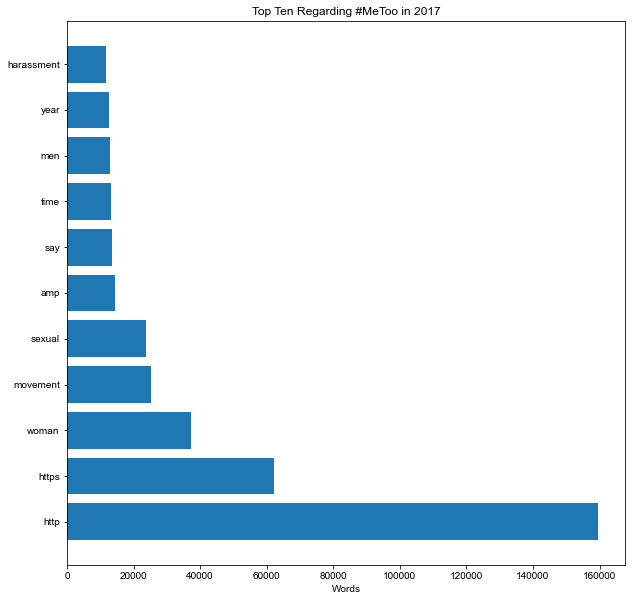

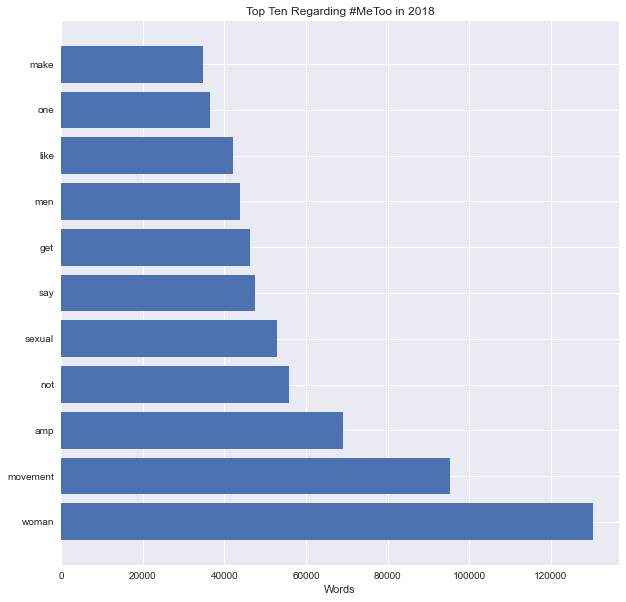

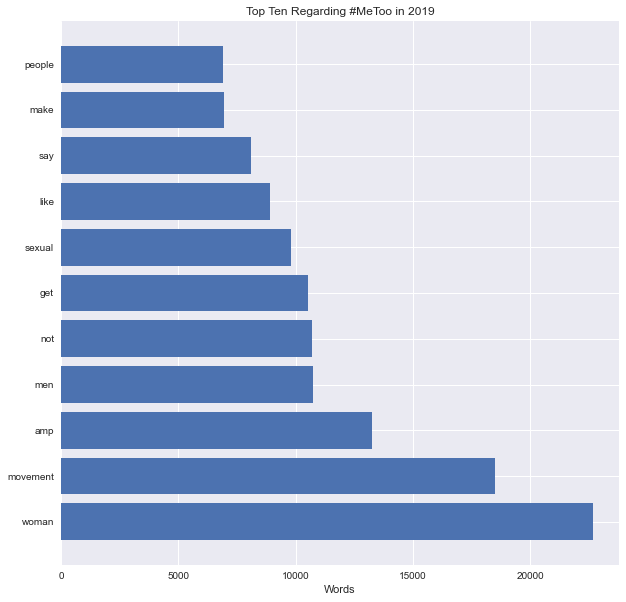

In [20]:
# Plot top ten words in each year
top_10_2017 = token_2017[:11]
fig, ax = plt.subplots(figsize = (10, 10))
plt.style.use('seaborn')
ax.barh(top_10_2017['token'], top_10_2017['token_count']) 
plt.xlabel('Count')
plt.xlabel('Words')
plt.title('Top Ten Regarding #MeToo in 2017')

top_10_2018 = token_2018[:11]
fig, ax = plt.subplots(figsize = (10, 10))
plt.style.use('seaborn')
ax.barh(top_10_2018['token'], top_10_2018['token_count']) 
plt.xlabel('Count')
plt.xlabel('Words')
plt.title('Top Ten Regarding #MeToo in 2018')

top_10_2019 = token_2019[:11]
fig, ax = plt.subplots(figsize = (10, 10))
plt.style.use('seaborn')
ax.barh(top_10_2019['token'], top_10_2019['token_count']) 
plt.xlabel('Count')
plt.xlabel('Words')
plt.title('Top Ten Regarding #MeToo in 2019')

# N-Grams

N-grams capture the language structure from a statistical point of view, and give us insight into what letter is likely to follow given one. The longer the n-gram (higher the 'n'), the more context you have to work with.

In [21]:
df_2017_2_grams = df_2017[['Short Tweets', 'Lemmatized', 'Tweets with no Stopwords']]
df_2017_2_grams

,Short Tweets,Lemmatized,Tweets with no Stopwords
59965,zeg nee duwt gewoon tong mijn mond waarom fran...,ik zeg nee en je duwt gewoon je tong in mijn m...,ik zeg nee en je duwt gewoon je tong mijn mond...
59966,put alcohol mouth make bedroom #metoo http iuv...,she put alcohol in my mouth and make me go to ...,put alcohol mouth make go bedroom #metoo http ...
59967,something else need end well fucking #metoo bu...,here something else that need to end in as wel...,something else need end well fucking #metoo bu...
59968,light #metoo feel necessary unfounately happen...,in light of #metoo and all this i feel this be...,light #metoo feel necessary unfounately happen...
59969,#metoo,#metoo,#metoo
...,...,...,...
348579,chief justice john rob order misconduct review...,chief justice john rob order misconduct review...,chief justice john rob order misconduct review...
348580,need statweeting #metoo game #jaxvssf #jaguar,need to statweeting #metoo after this game #ja...,need statweeting #metoo game #jaxvssf #jaguar
348581,microsoft learn #metoo moment http unqiasprhe,what microsoft learn from our #metoo moment ht...,microsoft learn #metoo moment http co unqiasprhe
348582,#metoo say victim sexual harassment japan via ...,#metoo say victim of sexual harassment in japa...,#metoo say victim sexual harassment japan via ...


In [22]:
df_2017_2_grams['Tweets with no Stopwords'] = df_2017_2_grams['Tweets with no Stopwords'].str.replace("# ", "#")
df_2017_2_grams['Tweets with no Stopwords'] = df_2017_2_grams['Tweets with no Stopwords'].str.replace(" n't", "n't")
df_2017_2_grams['Tweets with no Stopwords'] = df_2017_2_grams['Tweets with no Stopwords'].str.replace(" '", "'")
df_2017_2_grams['Tweets with no Stopwords'] = df_2017_2_grams['Tweets with no Stopwords'].str.replace("gon na", "gonna")
df_2017_2_grams['Tweets with no Stopwords'] = df_2017_2_grams['Tweets with no Stopwords'].str.replace("' m", "'m")
df_2017_2_grams['Tweets with no Stopwords'] = df_2017_2_grams['Tweets with no Stopwords'].str.replace("' ve", "'ve")
df_2017_2_grams['Tweets with no Stopwords'] = df_2017_2_grams['Tweets with no Stopwords'].str.replace("' re", "'re")
df_2017_2_grams['Tweets with no Stopwords'] = df_2017_2_grams['Tweets with no Stopwords'].str.replace("' ll", "'ll")
df_2017_2_grams['Tweets with no Stopwords'] = df_2017_2_grams['Tweets with no Stopwords'].str.replace("wan na", "wanna")
df_2017_2_grams['Tweets with no Stopwords'] = df_2017_2_grams['Tweets with no Stopwords'].str.replace("http", "")
df_2017_2_grams['Tweets with no Stopwords'] = df_2017_2_grams['Tweets with no Stopwords'].str.replace("https", "")
df_2017_2_grams['Tweets with no Stopwords'] = df_2017_2_grams['Tweets with no Stopwords'].str.replace(" co ", "")
df_2017_2_grams['Tweets with no Stopwords'] = df_2017_2_grams['Tweets with no Stopwords'].str.replace("#metoo", "")
df_2017_2_grams.head()

,Short Tweets,Lemmatized,Tweets with no Stopwords
59965,zeg nee duwt gewoon tong mijn mond waarom fran...,ik zeg nee en je duwt gewoon je tong in mijn m...,ik zeg nee en je duwt gewoon je tong mijn mond...
59966,put alcohol mouth make bedroom #metoo http iuv...,she put alcohol in my mouth and make me go to ...,put alcohol mouth make go bedroom iuvltaekcu
59967,something else need end well fucking #metoo bu...,here something else that need to end in as wel...,something else need end well fucking bullshit...
59968,light #metoo feel necessary unfounately happen...,in light of #metoo and all this i feel this be...,light feel necessary unfounately happen ill show
59969,#metoo,#metoo,


In [23]:
df_2017_2_grams['2 grams'] = df_2017_2_grams['Tweets with no Stopwords'].apply(lambda x: [' '.join(ng) for ng in everygrams(tokenize(x), 2, 2)])
df_2017_2_grams

,Short Tweets,Lemmatized,Tweets with no Stopwords,2 grams
59965,zeg nee duwt gewoon tong mijn mond waarom fran...,ik zeg nee en je duwt gewoon je tong in mijn m...,ik zeg nee en je duwt gewoon je tong mijn mond...,"[ik zeg, zeg nee, nee en, en je, je duwt, duwt..."
59966,put alcohol mouth make bedroom #metoo http iuv...,she put alcohol in my mouth and make me go to ...,put alcohol mouth make go bedroom iuvltaekcu,"[put alcohol, alcohol mouth, mouth make, make ..."
59967,something else need end well fucking #metoo bu...,here something else that need to end in as wel...,something else need end well fucking bullshit...,"[something else, else need, need end, end well..."
59968,light #metoo feel necessary unfounately happen...,in light of #metoo and all this i feel this be...,light feel necessary unfounately happen ill show,"[light feel, feel necessary, necessary unfouna..."
59969,#metoo,#metoo,,[]
...,...,...,...,...
348579,chief justice john rob order misconduct review...,chief justice john rob order misconduct review...,chief justice john rob order misconduct review...,"[chief justice, justice john, john rob, rob or..."
348580,need statweeting #metoo game #jaxvssf #jaguar,need to statweeting #metoo after this game #ja...,need statweeting game #jaxvssf #jaguar,"[need statweeting, statweeting game, game #jax..."
348581,microsoft learn #metoo moment http unqiasprhe,what microsoft learn from our #metoo moment ht...,microsoft learn moment unqiasprhe,"[microsoft learn, learn moment, moment unqiasp..."
348582,#metoo say victim sexual harassment japan via ...,#metoo say victim of sexual harassment in japa...,say victim sexual harassment japan via asahi ...,"[say victim, victim sexual, sexual harassment,..."


In [24]:
token_2017_2_gram = get_token_frequency(df_2017_2_grams['2 grams'])
token_2017_2_gram = token_2017_2_gram.sort_values(by = 'token_count', ascending = False)
token_2017_2_gram.head(5)

,token,token_count,doc_appeared
token_id,,,
322,sexual harassment,7954,7897
1249,sexual assault,5487,5453
994,person year,4811,4774
2341,sexual misconduct,1964,1963
125,al franken,1807,1789


In [25]:
df_2018_2_grams = df_2018[['Short Tweets', 'Lemmatized', 'Tweets with no Stopwords']]
df_2018_2_grams

,Short Tweets,Lemmatized,Tweets with no Stopwords
0,cuando esta ora habla como leer los twit ivank...,cuando esta se ora habla e como leer los twit ...,cuando esta se ora habla e como leer los twit ...
1,require institution receive grant fund tell pi...,will require institution that receive grant fu...,require institution receive grant fund tell pi...
2,listen awesome feminist scholar cynthia enloe ...,listen to the awesome feminist scholar cynthia...,listen awesome feminist scholar cynthia enloe ...
3,http gwawglka,http t co gwawglka,http co gwawglka
4,ver donde est toda voceras colombianas del #me...,a ver donde est n toda la voceras colombianas ...,ver donde est n toda la voceras colombianas de...
...,...,...,...
931519,actual american might suggest actually show ho...,as an actual american might i suggest that you...,actual american might suggest actually show ho...
931520,understand lustful desire always think sexual ...,i understand you have a lustful desire for me ...,understand lustful desire always think sexual ...
931521,ask speak regard experience wonderful event su...,be ask to speak by regard my experience with a...,ask speak regard experience wonderful event su...
931522,thank thank need help please really could use ...,thank you thank you i need your help please i ...,thank thank need help please really could use ...


In [26]:
df_2018_2_grams['Tweets with no Stopwords'] = df_2018_2_grams['Tweets with no Stopwords'].str.replace("# ", "#")
df_2018_2_grams['Tweets with no Stopwords'] = df_2018_2_grams['Tweets with no Stopwords'].str.replace(" n't", "n't")
df_2018_2_grams['Tweets with no Stopwords'] = df_2018_2_grams['Tweets with no Stopwords'].str.replace(" '", "'")
df_2018_2_grams['Tweets with no Stopwords'] = df_2018_2_grams['Tweets with no Stopwords'].str.replace("gon na", "gonna")
df_2018_2_grams['Tweets with no Stopwords'] = df_2018_2_grams['Tweets with no Stopwords'].str.replace("' m", "'m")
df_2018_2_grams['Tweets with no Stopwords'] = df_2018_2_grams['Tweets with no Stopwords'].str.replace("' ve", "'ve")
df_2018_2_grams['Tweets with no Stopwords'] = df_2018_2_grams['Tweets with no Stopwords'].str.replace("' re", "'re")
df_2018_2_grams['Tweets with no Stopwords'] = df_2018_2_grams['Tweets with no Stopwords'].str.replace("' ll", "'ll")
df_2018_2_grams['Tweets with no Stopwords'] = df_2018_2_grams['Tweets with no Stopwords'].str.replace("wan na", "wanna")
df_2018_2_grams['Tweets with no Stopwords'] = df_2018_2_grams['Tweets with no Stopwords'].str.replace("http", "")
df_2018_2_grams['Tweets with no Stopwords'] = df_2018_2_grams['Tweets with no Stopwords'].str.replace("https", "")
df_2018_2_grams['Tweets with no Stopwords'] = df_2018_2_grams['Tweets with no Stopwords'].str.replace(" co ", "")
df_2018_2_grams['Tweets with no Stopwords'] = df_2018_2_grams['Tweets with no Stopwords'].str.replace("#metoo", "")
df_2018_2_grams.head()

,Short Tweets,Lemmatized,Tweets with no Stopwords
0,cuando esta ora habla como leer los twit ivank...,cuando esta se ora habla e como leer los twit ...,cuando esta se ora habla e como leer los twit ...
1,require institution receive grant fund tell pi...,will require institution that receive grant fu...,require institution receive grant fund tell pi...
2,listen awesome feminist scholar cynthia enloe ...,listen to the awesome feminist scholar cynthia...,listen awesome feminist scholar cynthia enloe ...
3,http gwawglka,http t co gwawglka,gwawglka
4,ver donde est toda voceras colombianas del #me...,a ver donde est n toda la voceras colombianas ...,ver donde est n toda la voceras colombianas de...


In [27]:
df_2018_2_grams['2 grams'] = df_2018_2_grams['Tweets with no Stopwords'].apply(lambda x: [' '.join(ng) for ng in everygrams(tokenize(x), 2, 2)])
df_2018_2_grams

,Short Tweets,Lemmatized,Tweets with no Stopwords,2 grams
0,cuando esta ora habla como leer los twit ivank...,cuando esta se ora habla e como leer los twit ...,cuando esta se ora habla e como leer los twit ...,"[cuando esta, esta se, se ora, ora habla, habl..."
1,require institution receive grant fund tell pi...,will require institution that receive grant fu...,require institution receive grant fund tell pi...,"[require institution, institution receive, rec..."
2,listen awesome feminist scholar cynthia enloe ...,listen to the awesome feminist scholar cynthia...,listen awesome feminist scholar cynthia enloe ...,"[listen awesome, awesome feminist, feminist sc..."
3,http gwawglka,http t co gwawglka,gwawglka,[]
4,ver donde est toda voceras colombianas del #me...,a ver donde est n toda la voceras colombianas ...,ver donde est n toda la voceras colombianas de...,"[ver donde, donde est, est n, n toda, toda la,..."
...,...,...,...,...
931519,actual american might suggest actually show ho...,as an actual american might i suggest that you...,actual american might suggest actually show ho...,"[actual american, american might, might sugges..."
931520,understand lustful desire always think sexual ...,i understand you have a lustful desire for me ...,understand lustful desire always think sexual ...,"[understand lustful, lustful desire, desire al..."
931521,ask speak regard experience wonderful event su...,be ask to speak by regard my experience with a...,ask speak regard experience wonderful event su...,"[ask speak, speak regard, regard experience, e..."
931522,thank thank need help please really could use ...,thank you thank you i need your help please i ...,thank thank need help please really could use ...,"[thank thank, thank need, need help, help plea..."


In [28]:
token_2018_2_gram = get_token_frequency(df_2018_2_grams['2 grams'])
token_2018_2_gram = token_2018_2_gram.sort_values(by = 'token_count', ascending = False)
token_2018_2_gram.head(5)

,token,token_count,doc_appeared
token_id,,,
224,sexual harassment,17090,16588
716,sexual assault,14913,14372
345,come forward,4354,4204
979905,mj akbar,3916,3800
3254,sexually assault,3663,3596


In [29]:
df_2019_2_grams = df_2019[['Short Tweets', 'Lemmatized', 'Tweets with no Stopwords']]
df_2019_2_grams

,Short Tweets,Lemmatized,Tweets with no Stopwords
931524,prosecutor,ex prosecutor and,ex prosecutor
931525,thread raw reality woman psychological affect ...,thread on the raw reality of a woman s psychol...,thread raw reality woman psychological affect ...
931526,thing predator send ceain day holiday etc like...,thing predator send on ceain day holiday etc l...,thing predator send ceain day holiday etc like...
931527,let leave insist people must forgive abuser heal,let s leave insist people must forgive their a...,let leave insist people must forgive abuser heal
931528,instead movement i'm hop see movement indictme...,instead of the movement i'm hop see the moveme...,instead movement i'm hop see movement indictme...
...,...,...,...
1048253,response domestic violence presbyterian church...,response to domestic violence in the presbyter...,response domestic violence presbyterian church...
1048254,shinygeekgirl mean response accusation twitter...,shinygeekgirl mean his response to accusation ...,shinygeekgirl mean response accusation twitter...
1048255,#metoo https stmtfrucoa',#metoo me too https t co stmtfrucoa',#metoo https co stmtfrucoa'
1048256,church mea culpa must genuine aaron zahra http...,the church x x s x x mea culpa x x must be gen...,church x x x x mea culpa x x must genuine aaro...


In [30]:
df_2019_2_grams['Tweets with no Stopwords'] = df_2019_2_grams['Tweets with no Stopwords'].str.replace("# ", "#")
df_2019_2_grams['Tweets with no Stopwords'] = df_2019_2_grams['Tweets with no Stopwords'].str.replace(" n't", "n't")
df_2019_2_grams['Tweets with no Stopwords'] = df_2019_2_grams['Tweets with no Stopwords'].str.replace(" '", "'")
df_2019_2_grams['Tweets with no Stopwords'] = df_2019_2_grams['Tweets with no Stopwords'].str.replace("gon na", "gonna")
df_2019_2_grams['Tweets with no Stopwords'] = df_2019_2_grams['Tweets with no Stopwords'].str.replace("' m", "'m")
df_2019_2_grams['Tweets with no Stopwords'] = df_2019_2_grams['Tweets with no Stopwords'].str.replace("' ve", "'ve")
df_2019_2_grams['Tweets with no Stopwords'] = df_2019_2_grams['Tweets with no Stopwords'].str.replace("' re", "'re")
df_2019_2_grams['Tweets with no Stopwords'] = df_2019_2_grams['Tweets with no Stopwords'].str.replace("' ll", "'ll")
df_2019_2_grams['Tweets with no Stopwords'] = df_2019_2_grams['Tweets with no Stopwords'].str.replace("wan na", "wanna")
df_2019_2_grams['Tweets with no Stopwords'] = df_2019_2_grams['Tweets with no Stopwords'].str.replace("http", "")
df_2019_2_grams['Tweets with no Stopwords'] = df_2019_2_grams['Tweets with no Stopwords'].str.replace("https", "")
df_2019_2_grams['Tweets with no Stopwords'] = df_2019_2_grams['Tweets with no Stopwords'].str.replace("co", "")
df_2019_2_grams['Tweets with no Stopwords'] = df_2019_2_grams['Tweets with no Stopwords'].str.replace("#metoo", "")
df_2019_2_grams['Tweets with no Stopwords'] = df_2019_2_grams['Tweets with no Stopwords'].str.replace(" x ", "")
df_2019_2_grams['Tweets with no Stopwords'] = df_2019_2_grams['Tweets with no Stopwords'].str.replace(" f ", "")
df_2019_2_grams['Tweets with no Stopwords'] = df_2019_2_grams['Tweets with no Stopwords'].str.replace(" x '", "")
df_2019_2_grams['Tweets with no Stopwords'] = df_2019_2_grams['Tweets with no Stopwords'].str.replace("x '", "")
df_2019_2_grams.head()

,Short Tweets,Lemmatized,Tweets with no Stopwords
931524,prosecutor,ex prosecutor and,ex prosecutor
931525,thread raw reality woman psychological affect ...,thread on the raw reality of a woman s psychol...,thread raw reality woman psychological affect ...
931526,thing predator send ceain day holiday etc like...,thing predator send on ceain day holiday etc l...,thing predator send ceain day holiday etc like...
931527,let leave insist people must forgive abuser heal,let s leave insist people must forgive their a...,let leave insist people must forgive abuser heal
931528,instead movement i'm hop see movement indictme...,instead of the movement i'm hop see the moveme...,instead movement i'm hop see movement indictme...


In [31]:
df_2019_2_grams['2 grams'] = df_2019_2_grams['Tweets with no Stopwords'].apply(lambda x: [' '.join(ng) for ng in everygrams(tokenize(x), 2, 2)])
df_2019_2_grams

,Short Tweets,Lemmatized,Tweets with no Stopwords,2 grams
931524,prosecutor,ex prosecutor and,ex prosecutor,[ex prosecutor]
931525,thread raw reality woman psychological affect ...,thread on the raw reality of a woman s psychol...,thread raw reality woman psychological affect ...,"[thread raw, raw reality, reality woman, woman..."
931526,thing predator send ceain day holiday etc like...,thing predator send on ceain day holiday etc l...,thing predator send ceain day holiday etc like...,"[thing predator, predator send, send ceain, ce..."
931527,let leave insist people must forgive abuser heal,let s leave insist people must forgive their a...,let leave insist people must forgive abuser heal,"[let leave, leave insist, insist people, peopl..."
931528,instead movement i'm hop see movement indictme...,instead of the movement i'm hop see the moveme...,instead movement i'm hop see movement indictme...,"[instead movement, movement i'm, i'm hop, hop ..."
...,...,...,...,...
1048253,response domestic violence presbyterian church...,response to domestic violence in the presbyter...,response domestic violence presbyterian church...,"[response domestic, domestic violence, violenc..."
1048254,shinygeekgirl mean response accusation twitter...,shinygeekgirl mean his response to accusation ...,shinygeekgirl mean response accusation twitter...,"[shinygeekgirl mean, mean response, response a..."
1048255,#metoo https stmtfrucoa',#metoo me too https t co stmtfrucoa',s stmtfrua',"[s stmtfrua, stmtfrua ']"
1048256,church mea culpa must genuine aaron zahra http...,the church x x s x x mea culpa x x must be gen...,churchxx mea culpax must genuine aaron zahra ...,"[churchxx mea, mea culpax, culpax must, must g..."


In [32]:
token_2019_2_gram = get_token_frequency(df_2019_2_grams['2 grams'])
token_2019_2_gram = token_2019_2_gram.sort_values(by = 'token_count', ascending = False)
token_2019_2_gram.head(5)

,token,token_count,doc_appeared
token_id,,,
51,sexual harassment,2762,2656
532,sexual assault,2652,2569
27789,r kelly,2002,1895
683066,x ',1224,1224
59,black woman,1122,980


Text(0.5, 1.0, 'Most common 2-grams in 2019')

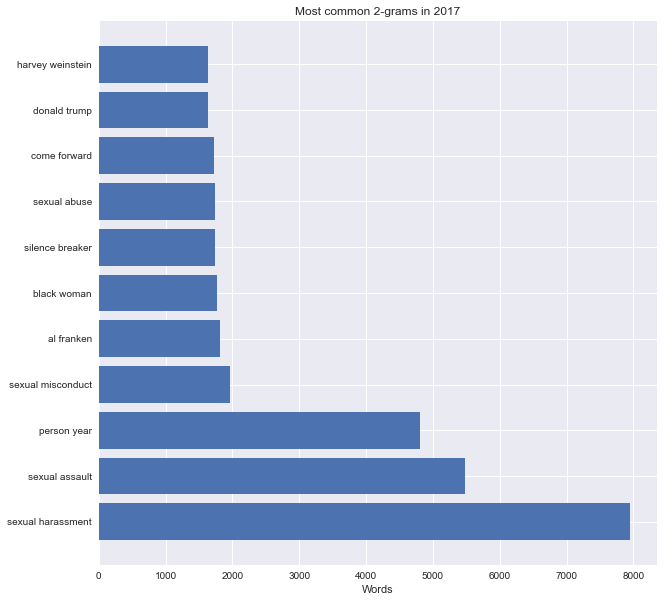

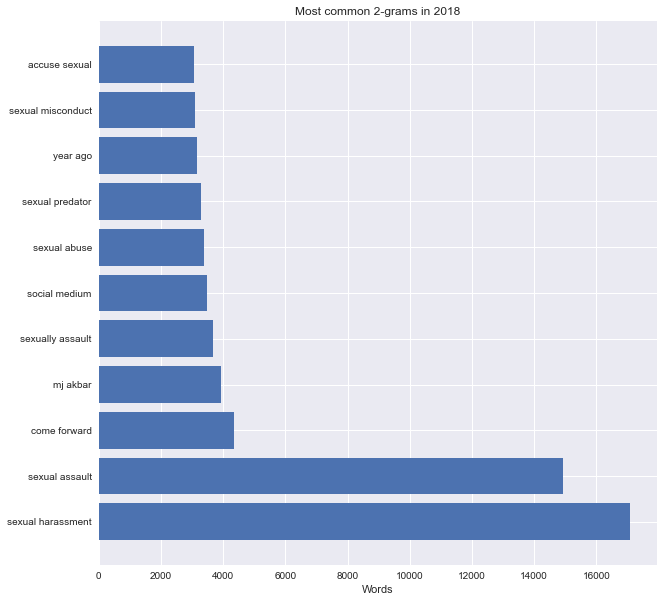

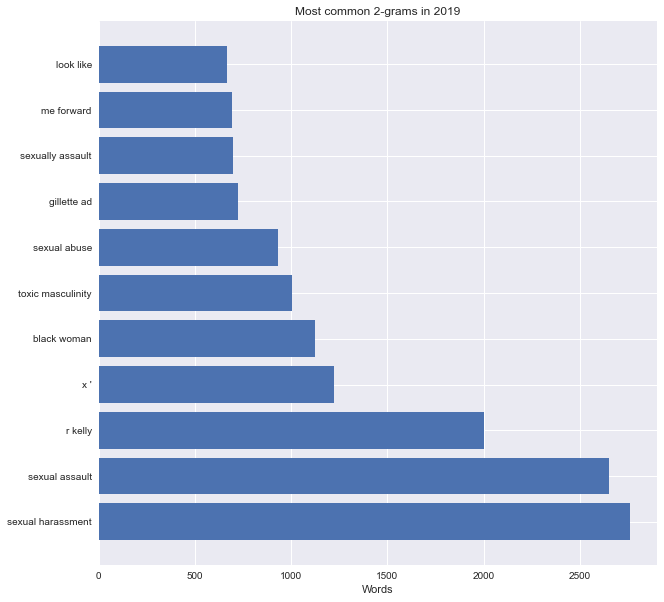

In [33]:
# Top ten 2-grams for the years
top_10_2_grams_2017 = token_2017_2_gram[:11]
fig, ax = plt.subplots(figsize = (10, 10))

plt.style.use('seaborn')
ax.barh(top_10_2_grams_2017['token'], top_10_2_grams_2017['token_count'])
plt.xlabel('Count')
plt.xlabel('Words')
plt.title('Most common 2-grams in 2017')

top_10_2_grams_2018 = token_2018_2_gram[:11]
fig, ax = plt.subplots(figsize = (10, 10))

plt.style.use('seaborn')
ax.barh(top_10_2_grams_2018['token'], top_10_2_grams_2018['token_count'])
plt.xlabel('Count')
plt.xlabel('Words')
plt.title('Most common 2-grams in 2018')

top_10_2_grams_2019 = token_2019_2_gram[:11]
fig, ax = plt.subplots(figsize = (10, 10))

plt.style.use('seaborn')
ax.barh(top_10_2_grams_2019['token'], top_10_2_grams_2019['token_count'])
plt.xlabel('Count')
plt.xlabel('Words')
plt.title('Most common 2-grams in 2019')

In [34]:
# Building 3-grams
df_2017_3_grams = df_2017[['Short Tweets', 'Lemmatized', 'Tweets with no Stopwords']]
df_2017_3_grams

,Short Tweets,Lemmatized,Tweets with no Stopwords
59965,zeg nee duwt gewoon tong mijn mond waarom fran...,ik zeg nee en je duwt gewoon je tong in mijn m...,ik zeg nee en je duwt gewoon je tong mijn mond...
59966,put alcohol mouth make bedroom #metoo http iuv...,she put alcohol in my mouth and make me go to ...,put alcohol mouth make go bedroom #metoo http ...
59967,something else need end well fucking #metoo bu...,here something else that need to end in as wel...,something else need end well fucking #metoo bu...
59968,light #metoo feel necessary unfounately happen...,in light of #metoo and all this i feel this be...,light #metoo feel necessary unfounately happen...
59969,#metoo,#metoo,#metoo
...,...,...,...
348579,chief justice john rob order misconduct review...,chief justice john rob order misconduct review...,chief justice john rob order misconduct review...
348580,need statweeting #metoo game #jaxvssf #jaguar,need to statweeting #metoo after this game #ja...,need statweeting #metoo game #jaxvssf #jaguar
348581,microsoft learn #metoo moment http unqiasprhe,what microsoft learn from our #metoo moment ht...,microsoft learn #metoo moment http co unqiasprhe
348582,#metoo say victim sexual harassment japan via ...,#metoo say victim of sexual harassment in japa...,#metoo say victim sexual harassment japan via ...


In [35]:
df_2017_3_grams['Tweets with no Stopwords'] = df_2017_3_grams['Tweets with no Stopwords'].str.replace("# ", "#")
df_2017_3_grams['Tweets with no Stopwords'] = df_2017_3_grams['Tweets with no Stopwords'].str.replace(" n't", "n't")
df_2017_3_grams['Tweets with no Stopwords'] = df_2017_3_grams['Tweets with no Stopwords'].str.replace(" '", "'")
df_2017_3_grams['Tweets with no Stopwords'] = df_2017_3_grams['Tweets with no Stopwords'].str.replace("gon na", "gonna")
df_2017_3_grams['Tweets with no Stopwords'] = df_2017_3_grams['Tweets with no Stopwords'].str.replace("' m", "'m")
df_2017_3_grams['Tweets with no Stopwords'] = df_2017_3_grams['Tweets with no Stopwords'].str.replace("' ve", "'ve")
df_2017_3_grams['Tweets with no Stopwords'] = df_2017_3_grams['Tweets with no Stopwords'].str.replace("' re", "'re")
df_2017_3_grams['Tweets with no Stopwords'] = df_2017_3_grams['Tweets with no Stopwords'].str.replace("' ll", "'ll")
df_2017_3_grams['Tweets with no Stopwords'] = df_2017_3_grams['Tweets with no Stopwords'].str.replace("wan na", "wanna")
df_2017_3_grams['Tweets with no Stopwords'] = df_2017_3_grams['Tweets with no Stopwords'].str.replace("http", "")
df_2017_3_grams['Tweets with no Stopwords'] = df_2017_3_grams['Tweets with no Stopwords'].str.replace("https", "")
df_2017_3_grams['Tweets with no Stopwords'] = df_2017_3_grams['Tweets with no Stopwords'].str.replace(" co ", "")
df_2017_3_grams['Tweets with no Stopwords'] = df_2017_3_grams['Tweets with no Stopwords'].str.replace("#metoo", "")
df_2017_3_grams.head()

,Short Tweets,Lemmatized,Tweets with no Stopwords
59965,zeg nee duwt gewoon tong mijn mond waarom fran...,ik zeg nee en je duwt gewoon je tong in mijn m...,ik zeg nee en je duwt gewoon je tong mijn mond...
59966,put alcohol mouth make bedroom #metoo http iuv...,she put alcohol in my mouth and make me go to ...,put alcohol mouth make go bedroom iuvltaekcu
59967,something else need end well fucking #metoo bu...,here something else that need to end in as wel...,something else need end well fucking bullshit...
59968,light #metoo feel necessary unfounately happen...,in light of #metoo and all this i feel this be...,light feel necessary unfounately happen ill show
59969,#metoo,#metoo,


In [36]:
df_2017_3_grams['3 grams'] = df_2017_3_grams['Tweets with no Stopwords'].apply(lambda x: [' '.join(ng) for ng in everygrams(tokenize(x), 3, 3)])
df_2017_3_grams

,Short Tweets,Lemmatized,Tweets with no Stopwords,3 grams
59965,zeg nee duwt gewoon tong mijn mond waarom fran...,ik zeg nee en je duwt gewoon je tong in mijn m...,ik zeg nee en je duwt gewoon je tong mijn mond...,"[ik zeg nee, zeg nee en, nee en je, en je duwt..."
59966,put alcohol mouth make bedroom #metoo http iuv...,she put alcohol in my mouth and make me go to ...,put alcohol mouth make go bedroom iuvltaekcu,"[put alcohol mouth, alcohol mouth make, mouth ..."
59967,something else need end well fucking #metoo bu...,here something else that need to end in as wel...,something else need end well fucking bullshit...,"[something else need, else need end, need end ..."
59968,light #metoo feel necessary unfounately happen...,in light of #metoo and all this i feel this be...,light feel necessary unfounately happen ill show,"[light feel necessary, feel necessary unfounat..."
59969,#metoo,#metoo,,[]
...,...,...,...,...
348579,chief justice john rob order misconduct review...,chief justice john rob order misconduct review...,chief justice john rob order misconduct review...,"[chief justice john, justice john rob, john ro..."
348580,need statweeting #metoo game #jaxvssf #jaguar,need to statweeting #metoo after this game #ja...,need statweeting game #jaxvssf #jaguar,"[need statweeting game, statweeting game #jaxv..."
348581,microsoft learn #metoo moment http unqiasprhe,what microsoft learn from our #metoo moment ht...,microsoft learn moment unqiasprhe,"[microsoft learn moment, learn moment unqiasprhe]"
348582,#metoo say victim sexual harassment japan via ...,#metoo say victim of sexual harassment in japa...,say victim sexual harassment japan via asahi ...,"[say victim sexual, victim sexual harassment, ..."


In [37]:
token_2017_3_gram = get_token_frequency(df_2017_3_grams['3 grams'])
token_2017_3_gram = token_2017_3_gram.sort_values(by = 'token_count', ascending = False)
token_2017_3_gram.head(5)

,token,token_count,doc_appeared
token_id,,,
8602,time person year,1056,1040
28159,italy like meh,707,707
2789,spar woody allen,703,703
2788,revolution spar woody,688,688
2786,dylan farrow revolution,651,651


In [38]:
df_2018_3_grams = df_2018[['Short Tweets', 'Lemmatized', 'Tweets with no Stopwords']]
df_2018_3_grams

,Short Tweets,Lemmatized,Tweets with no Stopwords
0,cuando esta ora habla como leer los twit ivank...,cuando esta se ora habla e como leer los twit ...,cuando esta se ora habla e como leer los twit ...
1,require institution receive grant fund tell pi...,will require institution that receive grant fu...,require institution receive grant fund tell pi...
2,listen awesome feminist scholar cynthia enloe ...,listen to the awesome feminist scholar cynthia...,listen awesome feminist scholar cynthia enloe ...
3,http gwawglka,http t co gwawglka,http co gwawglka
4,ver donde est toda voceras colombianas del #me...,a ver donde est n toda la voceras colombianas ...,ver donde est n toda la voceras colombianas de...
...,...,...,...
931519,actual american might suggest actually show ho...,as an actual american might i suggest that you...,actual american might suggest actually show ho...
931520,understand lustful desire always think sexual ...,i understand you have a lustful desire for me ...,understand lustful desire always think sexual ...
931521,ask speak regard experience wonderful event su...,be ask to speak by regard my experience with a...,ask speak regard experience wonderful event su...
931522,thank thank need help please really could use ...,thank you thank you i need your help please i ...,thank thank need help please really could use ...


In [39]:
df_2018_3_grams['Tweets with no Stopwords'] = df_2018_3_grams['Tweets with no Stopwords'].str.replace("# ", "#")
df_2018_3_grams['Tweets with no Stopwords'] = df_2018_3_grams['Tweets with no Stopwords'].str.replace(" n't", "n't")
df_2018_3_grams['Tweets with no Stopwords'] = df_2018_3_grams['Tweets with no Stopwords'].str.replace(" '", "'")
df_2018_3_grams['Tweets with no Stopwords'] = df_2018_3_grams['Tweets with no Stopwords'].str.replace("gon na", "gonna")
df_2018_3_grams['Tweets with no Stopwords'] = df_2018_3_grams['Tweets with no Stopwords'].str.replace("' m", "'m")
df_2018_3_grams['Tweets with no Stopwords'] = df_2018_3_grams['Tweets with no Stopwords'].str.replace("' ve", "'ve")
df_2018_3_grams['Tweets with no Stopwords'] = df_2018_3_grams['Tweets with no Stopwords'].str.replace("' re", "'re")
df_2018_3_grams['Tweets with no Stopwords'] = df_2018_3_grams['Tweets with no Stopwords'].str.replace("' ll", "'ll")
df_2018_3_grams['Tweets with no Stopwords'] = df_2018_3_grams['Tweets with no Stopwords'].str.replace("wan na", "wanna")
df_2018_3_grams['Tweets with no Stopwords'] = df_2018_3_grams['Tweets with no Stopwords'].str.replace("http", "")
df_2018_3_grams['Tweets with no Stopwords'] = df_2018_3_grams['Tweets with no Stopwords'].str.replace("https", "")
df_2018_3_grams['Tweets with no Stopwords'] = df_2018_3_grams['Tweets with no Stopwords'].str.replace(" co ", "")
df_2018_3_grams['Tweets with no Stopwords'] = df_2018_3_grams['Tweets with no Stopwords'].str.replace("#metoo", "")
df_2018_3_grams.head()

,Short Tweets,Lemmatized,Tweets with no Stopwords
0,cuando esta ora habla como leer los twit ivank...,cuando esta se ora habla e como leer los twit ...,cuando esta se ora habla e como leer los twit ...
1,require institution receive grant fund tell pi...,will require institution that receive grant fu...,require institution receive grant fund tell pi...
2,listen awesome feminist scholar cynthia enloe ...,listen to the awesome feminist scholar cynthia...,listen awesome feminist scholar cynthia enloe ...
3,http gwawglka,http t co gwawglka,gwawglka
4,ver donde est toda voceras colombianas del #me...,a ver donde est n toda la voceras colombianas ...,ver donde est n toda la voceras colombianas de...


In [40]:
df_2018_3_grams['3 grams'] = df_2018_3_grams['Tweets with no Stopwords'].apply(lambda x: [' '.join(ng) for ng in everygrams(tokenize(x), 3, 3)])
df_2018_3_grams

,Short Tweets,Lemmatized,Tweets with no Stopwords,3 grams
0,cuando esta ora habla como leer los twit ivank...,cuando esta se ora habla e como leer los twit ...,cuando esta se ora habla e como leer los twit ...,"[cuando esta se, esta se ora, se ora habla, or..."
1,require institution receive grant fund tell pi...,will require institution that receive grant fu...,require institution receive grant fund tell pi...,"[require institution receive, institution rece..."
2,listen awesome feminist scholar cynthia enloe ...,listen to the awesome feminist scholar cynthia...,listen awesome feminist scholar cynthia enloe ...,"[listen awesome feminist, awesome feminist sch..."
3,http gwawglka,http t co gwawglka,gwawglka,[]
4,ver donde est toda voceras colombianas del #me...,a ver donde est n toda la voceras colombianas ...,ver donde est n toda la voceras colombianas de...,"[ver donde est, donde est n, est n toda, n tod..."
...,...,...,...,...
931519,actual american might suggest actually show ho...,as an actual american might i suggest that you...,actual american might suggest actually show ho...,"[actual american might, american might suggest..."
931520,understand lustful desire always think sexual ...,i understand you have a lustful desire for me ...,understand lustful desire always think sexual ...,"[understand lustful desire, lustful desire alw..."
931521,ask speak regard experience wonderful event su...,be ask to speak by regard my experience with a...,ask speak regard experience wonderful event su...,"[ask speak regard, speak regard experience, re..."
931522,thank thank need help please really could use ...,thank you thank you i need your help please i ...,thank thank need help please really could use ...,"[thank thank need, thank need help, need help ..."


In [41]:
token_2018_3_gram = get_token_frequency(df_2018_3_grams['3 grams'])
token_2018_3_gram = token_2018_3_gram.sort_values(by = 'token_count', ascending = False)
token_2018_3_gram.head(5)

,token,token_count,doc_appeared
token_id,,,
1786618,baby cold outside,1709,1689
10035,accuse sexual harassment,1351,1338
387201,christine blasey ford,1097,1092
20165,victim sexual assault,1051,1042
16257,sexual harassment allegation,1026,1023


In [42]:
df_2019_3_grams = df_2019[['Short Tweets', 'Lemmatized', 'Tweets with no Stopwords']]
df_2019_3_grams

,Short Tweets,Lemmatized,Tweets with no Stopwords
931524,prosecutor,ex prosecutor and,ex prosecutor
931525,thread raw reality woman psychological affect ...,thread on the raw reality of a woman s psychol...,thread raw reality woman psychological affect ...
931526,thing predator send ceain day holiday etc like...,thing predator send on ceain day holiday etc l...,thing predator send ceain day holiday etc like...
931527,let leave insist people must forgive abuser heal,let s leave insist people must forgive their a...,let leave insist people must forgive abuser heal
931528,instead movement i'm hop see movement indictme...,instead of the movement i'm hop see the moveme...,instead movement i'm hop see movement indictme...
...,...,...,...
1048253,response domestic violence presbyterian church...,response to domestic violence in the presbyter...,response domestic violence presbyterian church...
1048254,shinygeekgirl mean response accusation twitter...,shinygeekgirl mean his response to accusation ...,shinygeekgirl mean response accusation twitter...
1048255,#metoo https stmtfrucoa',#metoo me too https t co stmtfrucoa',#metoo https co stmtfrucoa'
1048256,church mea culpa must genuine aaron zahra http...,the church x x s x x mea culpa x x must be gen...,church x x x x mea culpa x x must genuine aaro...


In [43]:
df_2019_3_grams['Tweets with no Stopwords'] = df_2019_3_grams['Tweets with no Stopwords'].str.replace("# ", "#")
df_2019_3_grams['Tweets with no Stopwords'] = df_2019_3_grams['Tweets with no Stopwords'].str.replace(" n't", "n't")
df_2019_3_grams['Tweets with no Stopwords'] = df_2019_3_grams['Tweets with no Stopwords'].str.replace(" '", "'")
df_2019_3_grams['Tweets with no Stopwords'] = df_2019_3_grams['Tweets with no Stopwords'].str.replace("gon na", "gonna")
df_2019_3_grams['Tweets with no Stopwords'] = df_2019_3_grams['Tweets with no Stopwords'].str.replace("' m", "'m")
df_2019_3_grams['Tweets with no Stopwords'] = df_2019_3_grams['Tweets with no Stopwords'].str.replace("' ve", "'ve")
df_2019_3_grams['Tweets with no Stopwords'] = df_2019_3_grams['Tweets with no Stopwords'].str.replace("' re", "'re")
df_2019_3_grams['Tweets with no Stopwords'] = df_2019_3_grams['Tweets with no Stopwords'].str.replace("' ll", "'ll")
df_2019_3_grams['Tweets with no Stopwords'] = df_2019_3_grams['Tweets with no Stopwords'].str.replace("wan na", "wanna")
df_2019_3_grams['Tweets with no Stopwords'] = df_2019_3_grams['Tweets with no Stopwords'].str.replace("http", "")
df_2019_3_grams['Tweets with no Stopwords'] = df_2019_3_grams['Tweets with no Stopwords'].str.replace("https", "")
df_2019_3_grams['Tweets with no Stopwords'] = df_2019_3_grams['Tweets with no Stopwords'].str.replace(" co ", "")
df_2019_3_grams['Tweets with no Stopwords'] = df_2019_3_grams['Tweets with no Stopwords'].str.replace("#metoo", "")
df_2019_3_grams['Tweets with no Stopwords'] = df_2019_3_grams['Tweets with no Stopwords'].str.replace(" x ", "")
df_2019_3_grams['Tweets with no Stopwords'] = df_2019_3_grams['Tweets with no Stopwords'].str.replace(" f ", "")
df_2019_3_grams['Tweets with no Stopwords'] = df_2019_3_grams['Tweets with no Stopwords'].str.replace(" x '", "")
df_2019_3_grams['Tweets with no Stopwords'] = df_2019_3_grams['Tweets with no Stopwords'].str.replace("x '", "")
df_2019_3_grams.head()

,Short Tweets,Lemmatized,Tweets with no Stopwords
931524,prosecutor,ex prosecutor and,ex prosecutor
931525,thread raw reality woman psychological affect ...,thread on the raw reality of a woman s psychol...,thread raw reality woman psychological affect ...
931526,thing predator send ceain day holiday etc like...,thing predator send on ceain day holiday etc l...,thing predator send ceain day holiday etc like...
931527,let leave insist people must forgive abuser heal,let s leave insist people must forgive their a...,let leave insist people must forgive abuser heal
931528,instead movement i'm hop see movement indictme...,instead of the movement i'm hop see the moveme...,instead movement i'm hop see movement indictme...


In [44]:
df_2019_3_grams['3 grams'] = df_2019_3_grams['Tweets with no Stopwords'].apply(lambda x: [' '.join(ng) for ng in everygrams(tokenize(x), 3, 3)])
df_2019_3_grams

,Short Tweets,Lemmatized,Tweets with no Stopwords,3 grams
931524,prosecutor,ex prosecutor and,ex prosecutor,[]
931525,thread raw reality woman psychological affect ...,thread on the raw reality of a woman s psychol...,thread raw reality woman psychological affect ...,"[thread raw reality, raw reality woman, realit..."
931526,thing predator send ceain day holiday etc like...,thing predator send on ceain day holiday etc l...,thing predator send ceain day holiday etc like...,"[thing predator send, predator send ceain, sen..."
931527,let leave insist people must forgive abuser heal,let s leave insist people must forgive their a...,let leave insist people must forgive abuser heal,"[let leave insist, leave insist people, insist..."
931528,instead movement i'm hop see movement indictme...,instead of the movement i'm hop see the moveme...,instead movement i'm hop see movement indictme...,"[instead movement i'm, movement i'm hop, i'm h..."
...,...,...,...,...
1048253,response domestic violence presbyterian church...,response to domestic violence in the presbyter...,response domestic violence presbyterian church...,"[response domestic violence, domestic violence..."
1048254,shinygeekgirl mean response accusation twitter...,shinygeekgirl mean his response to accusation ...,shinygeekgirl mean response accusation twitter...,"[shinygeekgirl mean response, mean response ac..."
1048255,#metoo https stmtfrucoa',#metoo me too https t co stmtfrucoa',sstmtfrucoa',[]
1048256,church mea culpa must genuine aaron zahra http...,the church x x s x x mea culpa x x must be gen...,churchxx mea culpax must genuine aaron zahra g...,"[churchxx mea culpax, mea culpax must, culpax ..."


In [45]:
token_2019_3_gram = get_token_frequency(df_2019_3_grams['3 grams'])
token_2019_3_gram = token_2019_3_gram.sort_values(by = 'token_count', ascending = False)
token_2019_3_gram.head(5)

,token,token_count,doc_appeared
token_id,,,
314475,best man get,298,295
327066,gillette face backlash,297,296
7752,hate restore decency,296,296
341242,face backlash boycott,293,292
341239,' adve ',289,288


Text(0.5, 1.0, 'Most common 3-grams in 2019')

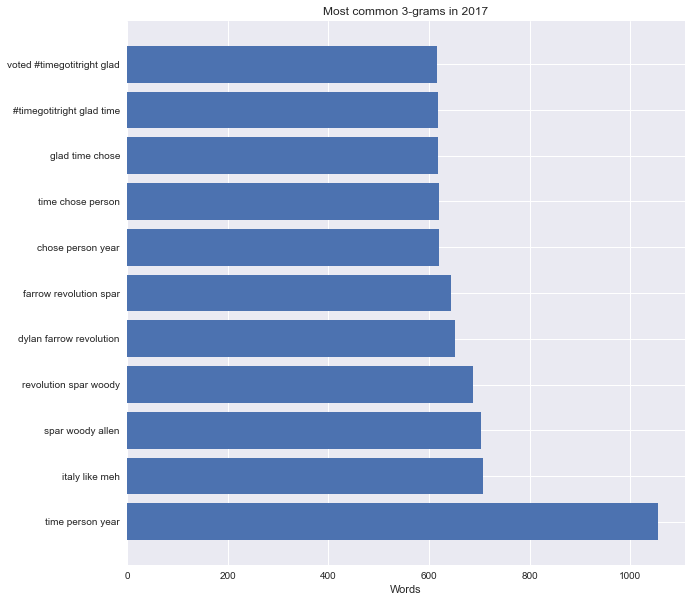

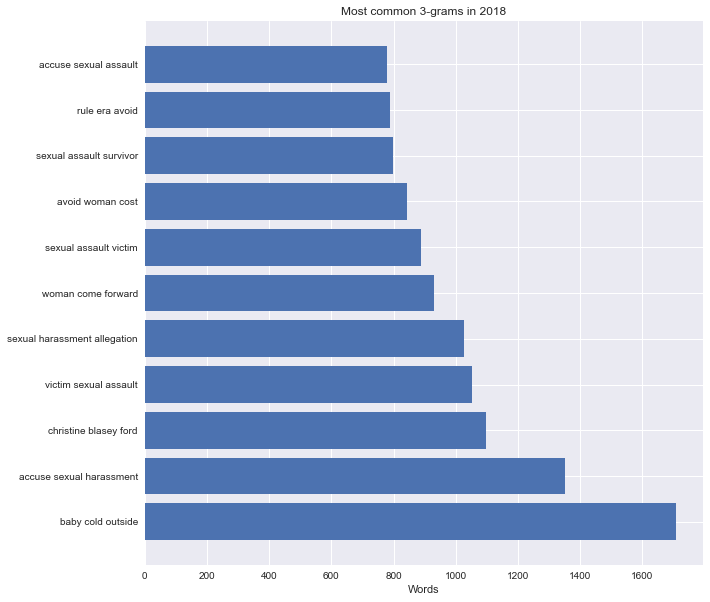

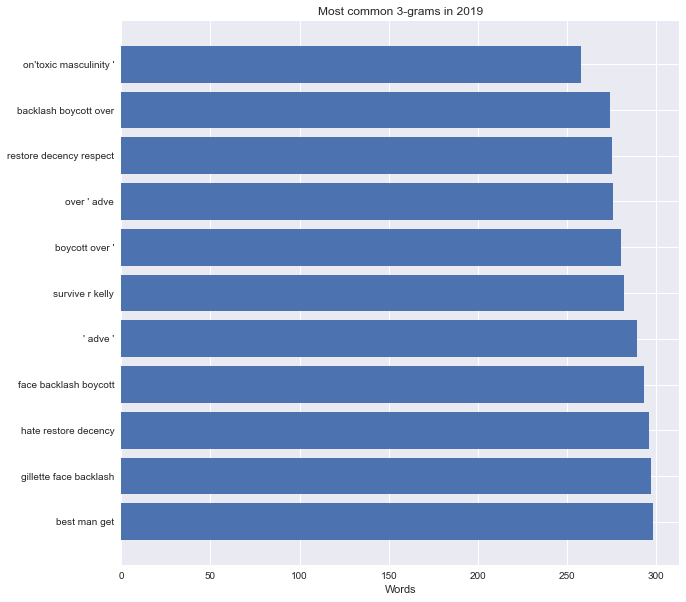

In [46]:
# Top ten 3-grams for the years
top_10_3_grams_2017 = token_2017_3_gram[:11]
fig, ax = plt.subplots(figsize = (10, 10))

plt.style.use('seaborn')
ax.barh(top_10_3_grams_2017['token'], top_10_3_grams_2017['token_count'])
plt.xlabel('Count')
plt.xlabel('Words')
plt.title('Most common 3-grams in 2017')

top_10_3_grams_2018 = token_2018_3_gram[:11]
fig, ax = plt.subplots(figsize = (10, 10))

plt.style.use('seaborn')
ax.barh(top_10_3_grams_2018['token'], top_10_3_grams_2018['token_count'])
plt.xlabel('Count')
plt.xlabel('Words')
plt.title('Most common 3-grams in 2018')

top_10_3_grams_2019 = token_2019_3_gram[:11]
fig, ax = plt.subplots(figsize = (10, 10))

plt.style.use('seaborn')
ax.barh(top_10_3_grams_2019['token'], top_10_3_grams_2019['token_count'])
plt.xlabel('Count')
plt.xlabel('Words')
plt.title('Most common 3-grams in 2019')